" Exploratory Data Analysis (EDA) for Real Estate Pricing: Unveiling the Dynamics of House Valuation in a Dynamic Market "

In [1]:
import pandas as pd
file_path = r'C:\Users\santh\Downloads\Next hikes_Project\housing_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

print(df.head())



   Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCo

#Inspecting Data Structure  


In [2]:
print(df.info())  # Overview of data types and non-null counts



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Check Basic Statistics:

In [3]:
print(df.describe())  # Summary statistics for numerical columns

        Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ..

Data Cleaning 

In [4]:
print(df.isnull().sum())  # Count of missing values in each column


Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [5]:
df = df.drop_duplicates()

Univariate Analysis:

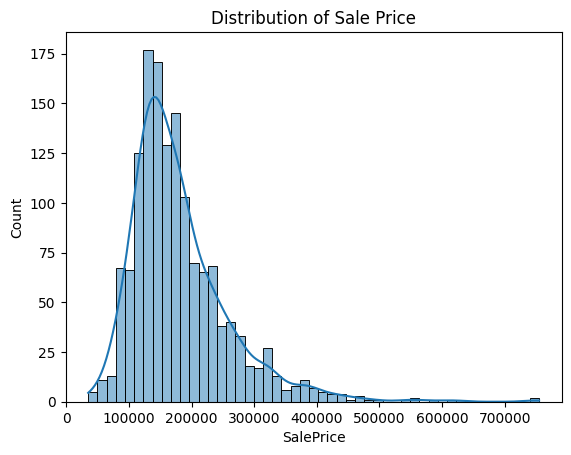

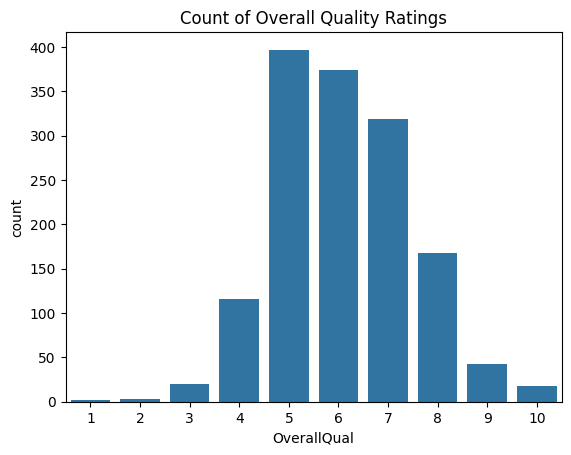

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Numerical Variable: SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()

# Categorical Variable: OverallQual
sns.countplot(x='OverallQual', data=df)
plt.title('Count of Overall Quality Ratings')
plt.show()


Multivariate Analysis

           SalePrice  GrLivArea
SalePrice   1.000000   0.708624
GrLivArea   0.708624   1.000000


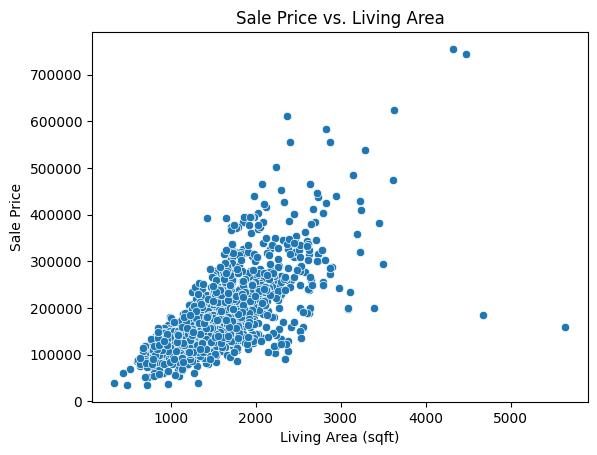

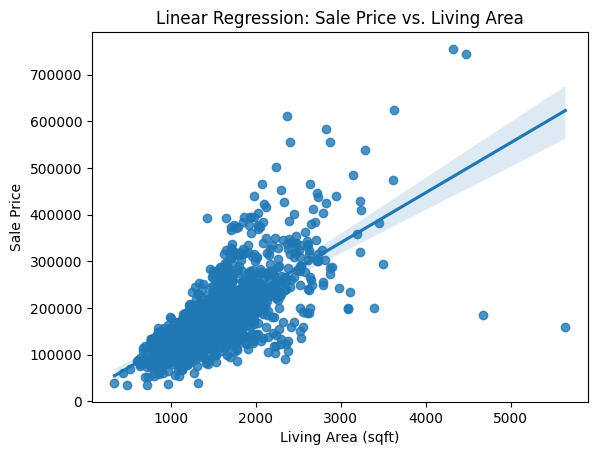

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Correlation Analysis
correlation_matrix = df[['SalePrice', 'GrLivArea']].corr()
print(correlation_matrix)

# Scatter Plot
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Sale Price vs. Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

# Linear Regression
sns.regplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Linear Regression: Sale Price vs. Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

Creating New Features for House Price Prediction

In [8]:
df['PricePerSqft'] = df['SalePrice'] / df['GrLivArea'] #Price per Square Foot:

df['Age'] = df['YrSold'] - df['YearBuilt'] #Age of the House:

df['TotalSqft'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['GarageArea'] #Total Square Footage:

df['Renovated'] = df['YearRemodAdd'] != df['YearBuilt'] #df['Renovated'] = df['YearRemodAdd'] != df['YearBuilt']


Correlation Analysis 

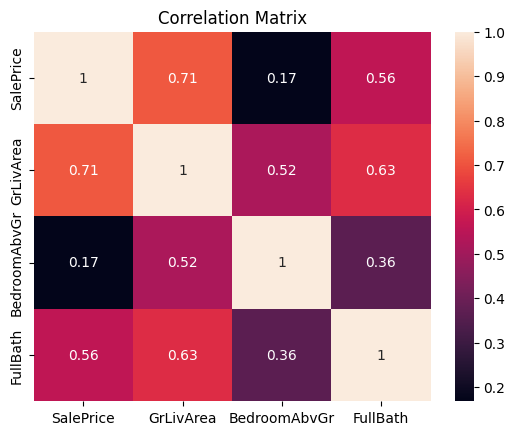

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
corr_matrix = df[['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath']].corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Scatter Plots : Visulaize the Relation between two numerical values 

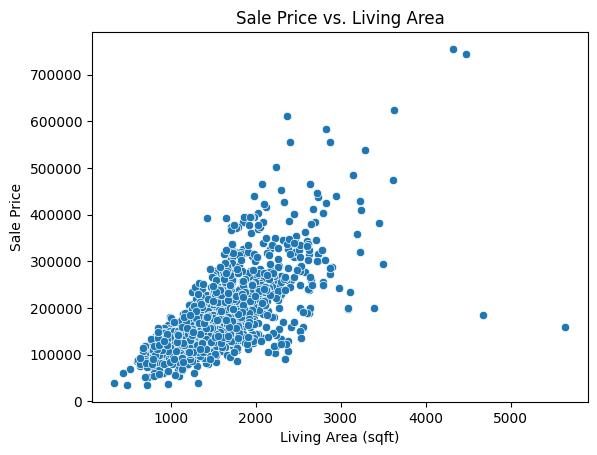

In [10]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Sale Price vs. Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

Regression Analysis

In [11]:
import statsmodels.api as sm

X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

X = sm.add_constant(X)  # Add a constant term
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     679.2
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          4.55e-276
Time:                        12:42:31   Log-Likelihood:                -17905.
No. Observations:                1460   AIC:                         3.582e+04
Df Residuals:                    1456   BIC:                         3.584e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.751e+04   5426.062      8.756   

1. Time Series Plots:

Visualizing Trends: Plot the house prices over time to identify trends, seasonality, and cyclical patterns.
Identifying Outliers: Detect anomalies or unusual price spikes.

In [12]:
df.columns.tolist() 

['Unnamed: 0',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'Open

. Using YearBuilt:

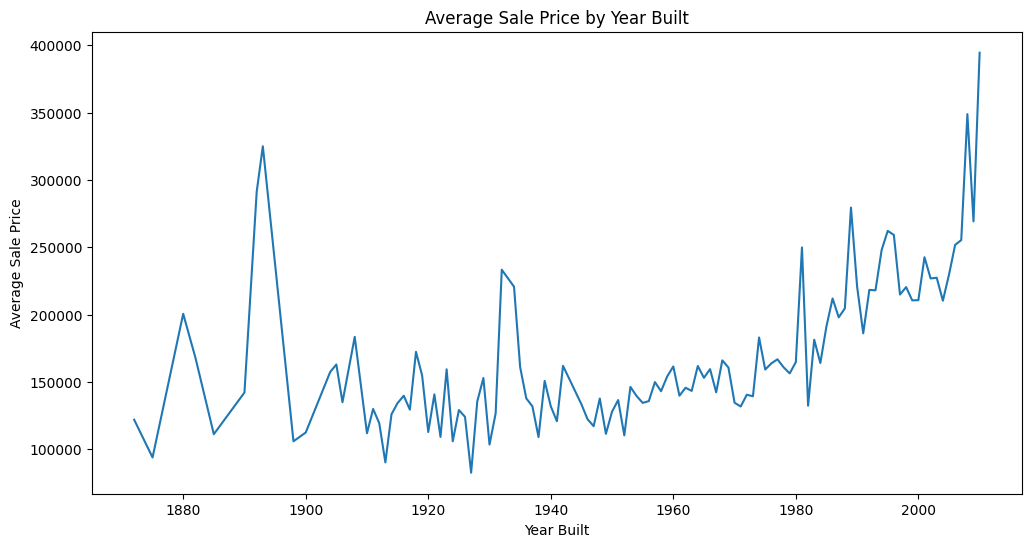

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Group the data by 'YearBuilt' and calculate the average sale price
df_grouped = df.groupby('YearBuilt')['SalePrice'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='YearBuilt', y='SalePrice', data=df_grouped)
plt.title('Average Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.show()

2. Using Sequential Index:

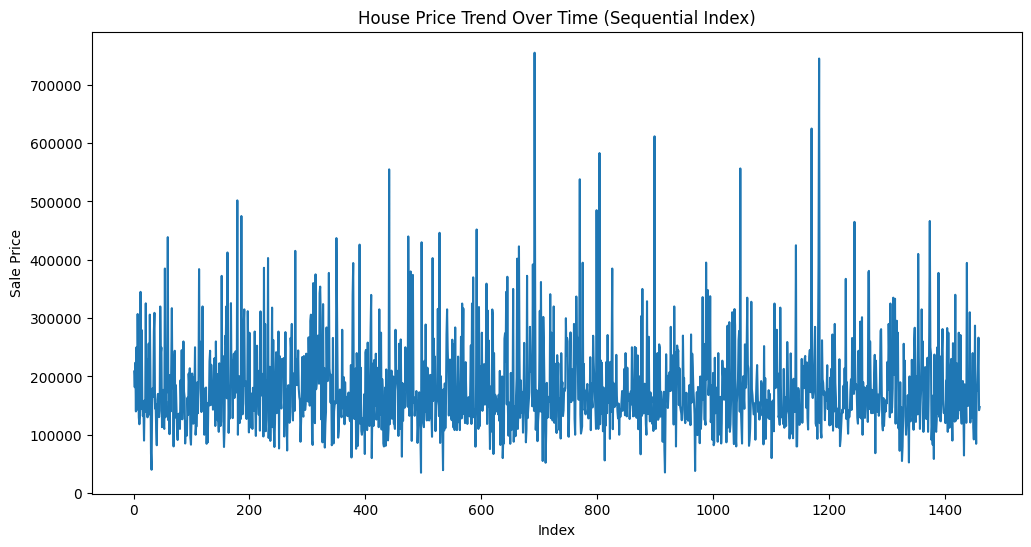

In [14]:
# Assign a sequential index to each row
df['Index'] = range(1, len(df) + 1)

# Plot the trend using the index
plt.figure(figsize=(12, 6))
sns.lineplot(x='Index', y='SalePrice', data=df)
plt.title('House Price Trend Over Time (Sequential Index)')
plt.xlabel('Index')
plt.ylabel('Sale Price')
plt.show()

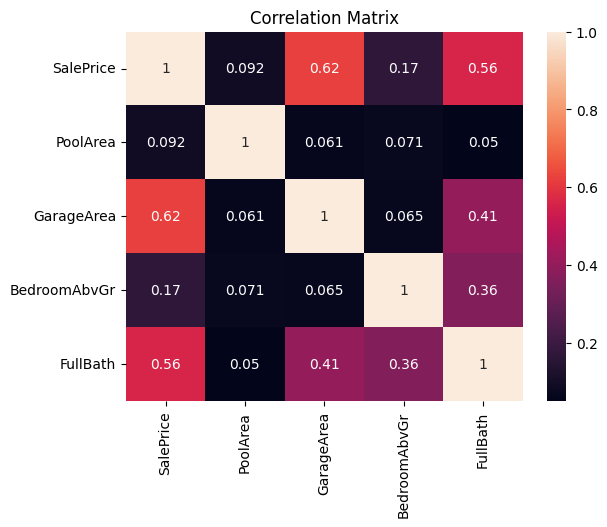

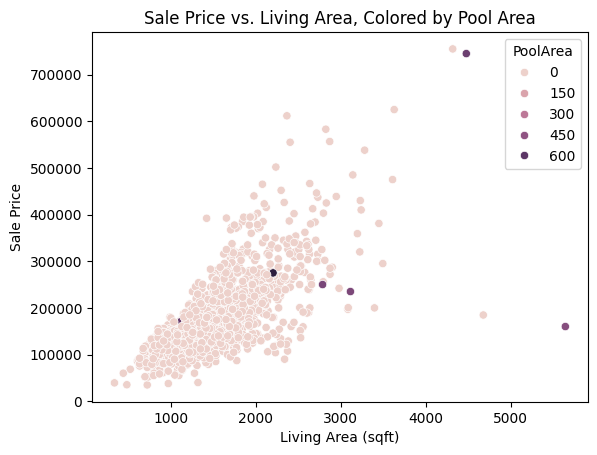

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     539.4
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:42:31   Log-Likelihood:                -17778.
No. Observations:                1460   AIC:                         3.557e+04
Df Residuals:                    1454   BIC:                         3.560e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.877e+04   5274.132      3.558   

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Correlation Matrix
corr_matrix = df[['SalePrice', 'PoolArea', 'GarageArea', 'BedroomAbvGr', 'FullBath']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='PoolArea', data=df)
plt.title('Sale Price vs. Living Area, Colored by Pool Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

# Regression Model
import statsmodels.api as sm

X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'PoolArea', 'GarageArea']]
y = df['SalePrice']

X = sm.add_constant(X)  # Add a constant term
model = sm.OLS(y, X).fit()
print(model.summary())